# Movie Genre Classification


In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')

# Data INgestion

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('train_data.txt', delimiter='\t')  # For tab-separated values
# Split the single column into multiple columns
df[['ID', 'TITLE', 'GENRE', 'DESCRIPTION']] = df['ID ::: TITLE ::: GENRE ::: DESCRIPTION'].str.split(' ::: ', expand=True)
# Drop the original combined column
df = df.drop('ID ::: TITLE ::: GENRE ::: DESCRIPTION', axis=1)
df.head()

,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54214 non-null  object
 1   TITLE        54214 non-null  object
 2   GENRE        54214 non-null  object
 3   DESCRIPTION  54214 non-null  object
dtypes: object(4)
memory usage: 1.7+ MB


Target is Genre

In [ ]:
df.isna().sum()

,0
ID,0
TITLE,0
GENRE,0
DESCRIPTION,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.shape

(54214, 4)

# Import Preprocessing

In [ ]:
import re

def preprocess_text(text :str) -> str:
  # str to lower case
  lower = text.lower()
  # remove puntuations
  no_punc = re.sub("[^a-z0-9 ]", "", lower) # provide space after a-z0-9 always
  return no_punc

In [ ]:
preprocess_text("Hello")

'hello'

In [ ]:
df["preprocessed_description"] = df["DESCRIPTION"].apply(preprocess_text)
df.head()

,ID,TITLE,GENRE,DESCRIPTION,preprocessed_description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...,listening in to a conversation between his doc...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...,a brother and sister with a past incestuous re...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...,as the bus empties the students for their fiel...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...,to help their unemployed father make ends meet...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...,the films title refers not only to the unrecov...


In [ ]:
df["preprocessed_title"] = df["TITLE"].apply(preprocess_text)
display(df.head())

,ID,TITLE,GENRE,DESCRIPTION,preprocessed_description,preprocessed_title
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...,listening in to a conversation between his doc...,oscar et la dame rose 2009
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...,a brother and sister with a past incestuous re...,cupid 1997
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...,as the bus empties the students for their fiel...,young wild and wonderful 1980
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...,to help their unemployed father make ends meet...,the secret sin 1915
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...,the films title refers not only to the unrecov...,the unrecovered 2007


In [ ]:
display(df["GENRE"].value_counts())

,count
GENRE,
drama,13613
documentary,13096
comedy,7447
short,5073
horror,2204
thriller,1591
action,1315
western,1032
reality-tv,884


In [ ]:

x = df[["preprocessed_description", "preprocessed_title"]]

In [ ]:
df = df.drop('ID', axis=1)
display(df.head())

,TITLE,GENRE,DESCRIPTION,preprocessed_description,preprocessed_title
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...,listening in to a conversation between his doc...,oscar et la dame rose 2009
1,Cupid (1997),thriller,A brother and sister with a past incestuous re...,a brother and sister with a past incestuous re...,cupid 1997
2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...,as the bus empties the students for their fiel...,young wild and wonderful 1980
3,The Secret Sin (1915),drama,To help their unemployed father make ends meet...,to help their unemployed father make ends meet...,the secret sin 1915
4,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...,the films title refers not only to the unrecov...,the unrecovered 2007


In [ ]:
df

,TITLE,GENRE,DESCRIPTION,preprocessed_description,preprocessed_title
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...,listening in to a conversation between his doc...,oscar et la dame rose 2009
1,Cupid (1997),thriller,A brother and sister with a past incestuous re...,a brother and sister with a past incestuous re...,cupid 1997
2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...,as the bus empties the students for their fiel...,young wild and wonderful 1980
3,The Secret Sin (1915),drama,To help their unemployed father make ends meet...,to help their unemployed father make ends meet...,the secret sin 1915
4,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...,the films title refers not only to the unrecov...,the unrecovered 2007
...,...,...,...,...,...
54209,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on B...,this shortlived nbc live sitcom centered on bo...,bonino 1953
54210,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The siste...,the next generation of exploitation the sister...,dead girls dont cry
54211,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about gr...",ze bestaan echt is a standup comedy about grow...,ronald goedemondt ze bestaan echt 2008
54212,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and have...,walter and vivian live in the country and have...,make your own bed 1944


In [ ]:
x = df[["preprocessed_description", "preprocessed_title"]]
y = df["GENRE"]

In [ ]:
x.head()

,preprocessed_description,preprocessed_title
0,listening in to a conversation between his doc...,oscar et la dame rose 2009
1,a brother and sister with a past incestuous re...,cupid 1997
2,as the bus empties the students for their fiel...,young wild and wonderful 1980
3,to help their unemployed father make ends meet...,the secret sin 1915
4,the films title refers not only to the unrecov...,the unrecovered 2007


In [ ]:
y.head()

,GENRE
0,drama
1,thriller
2,adult
3,drama
4,drama


In [ ]:
x.shape

(54214, 2)

In [ ]:
y.shape

(54214,)

# Applying TFIDF - Term Frequency – Inverse Document Frequency



In [ ]:
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
# Combine the preprocessed text from description and title
x_combined = x['preprocessed_description'] + ' ' + x['preprocessed_title']

# Use HashingVectorizer for memory efficiency
vectorizer = HashingVectorizer(n_features=2**18) # You can adjust the number of features
x_vectorized = vectorizer.fit_transform(x_combined)

display(x_vectorized.shape)

(54214, 262144)

In [ ]:
from sklearn.model_selection import train_test_split

# Applying Dimensionality Reduction using Truncated SVD

In [ ]:
from sklearn.decomposition import TruncatedSVD

# You can adjust the number of components based on your needs and experimentation
n_components = 300  # You can choose a different number of components
svd = TruncatedSVD(n_components=n_components)
x_reduced = svd.fit_transform(x_vectorized)

display(x_reduced.shape)

(54214, 300)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x_reduced,y,test_size=0.2,random_state=42)

In [ ]:
xtrain.shape

(43371, 300)

In [ ]:
xtest.shape

(10843, 300)

In [ ]:
ytrain.shape

(43371,)

In [ ]:
ytest.shape

(10843,)

In [ ]:
from keras.models import Sequential
from keras.layers import Input,Dense,Dropout
from keras.callbacks import EarlyStopping
from keras import regularizers
from sklearn.preprocessing import OneHotEncoder # Import OneHotEncoder
import numpy as np # Import numpy

In [ ]:
# One-hot encode the target variable
encoder = OneHotEncoder(sparse_output=False)
ytrain_encoded = encoder.fit_transform(np.array(ytrain).reshape(-1, 1))
ytest_encoded = encoder.transform(np.array(ytest).reshape(-1, 1))

model = Sequential(
    [
        Input(shape=(xtrain.shape[1],)),
        Dense(128,activation="relu",kernel_regularizer=regularizers.l2(0.01)),
        Dropout(0.5),
        Dense(64,activation="relu",kernel_regularizer=regularizers.l2(0.01)),
        Dropout(0.5),
        Dense(ytrain_encoded.shape[1],activation="softmax") # Output layer with units equal to number of genres and softmax activation
    ]
)

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 128)            │        38,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 27)             │         1,755 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,539 (189.61 KB)

 Trainable params: 48,539 (189.61 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"]) # Use categorical_crossentropy

In [ ]:
es = EarlyStopping(patience=10,restore_best_weights=True)

In [ ]:
hist = model.fit(xtrain,ytrain_encoded,validation_data=(xtest,ytest_encoded),epochs=100,callbacks=[es])

Epoch 1/100
1356/1356 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.3055 - loss: 2.8874 - val_accuracy: 0.4069 - val_loss: 2.2431
Epoch 2/100
1356/1356 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3989 - loss: 2.2730 - val_accuracy: 0.4193 - val_loss: 2.2023
Epoch 3/100
1356/1356 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4035 - loss: 2.2457 - val_accuracy: 0.4131 - val_loss: 2.1961
Epoch 4/100
1356/1356 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4070 - loss: 2.2329 - val_accuracy: 0.4260 - val_loss: 2.1683
Epoch 5/100
1356/1356 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4194 - loss: 2.2035 - val_accuracy: 0.4283 - val_loss: 2.1530
Epoch 6/100
1356/1356 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4206 - loss: 2.1863 - val_accuracy: 0.4302 - val_loss: 2.1551
Epoch 7/100
1356/1356 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4215 - loss: 2.1855 - val_accuracy: 0.4325 - val_loss: 2.1380
Epoch 8/100
1356/1356 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4163 - loss: 

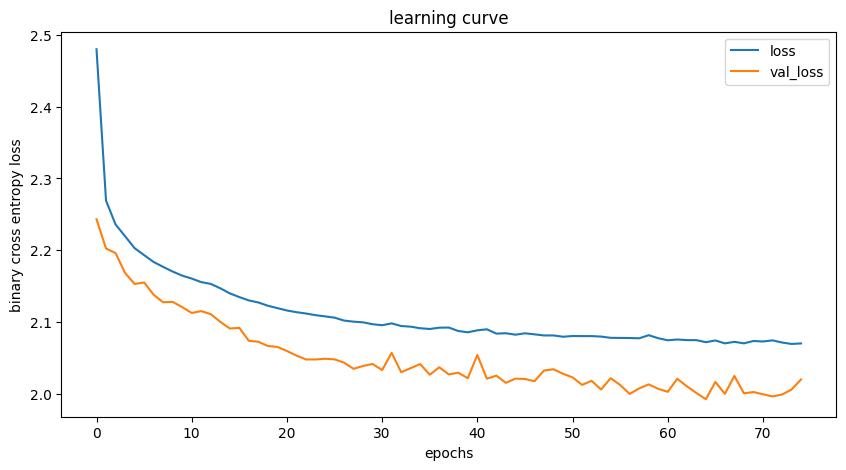

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(hist.history["loss"],label="loss")
plt.plot(hist.history["val_loss"],label="val_loss")
plt.xlabel("epochs")
plt.ylabel("binary cross entropy loss")
plt.title("learning curve")
plt.legend()
plt.show()

In [ ]:
model.evaluate(xtrain,ytrain_encoded)

1356/1356 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4608 - loss: 1.9947


[1.9922783374786377, 0.46196767687797546]

In [ ]:
model.evaluate(xtest,ytest_encoded)

339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4528 - loss: 2.0144


[1.9925423860549927, 0.4588213562965393]

In [ ]:
yprob_train = model.predict(xtrain)
yprob_test = model.predict(xtest)

1356/1356 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


**Reasoning**:
Load the test data, split the columns, and display the head of the dataframe.



**Reasoning**:
The test data file has a different format than the training data. It seems to be a single column with 'ID ::: TITLE ::: DESCRIPTION'. I need to read the file and split the single column into three columns.



In [ ]:
df_test = pd.read_csv('test_data.txt', delimiter='\t')
df_test[['ID', 'TITLE', 'DESCRIPTION']] = df_test['ID ::: TITLE ::: DESCRIPTION'].str.split(' ::: ', expand=True)
df_test = df_test.drop('ID ::: TITLE ::: DESCRIPTION', axis=1)
display(df_test.head())

,ID,TITLE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apart..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty chi..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family o...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with his..."
4,5,Er nu zhai (1955),Before he was known internationally as a marti...


**Reasoning**:
Apply the preprocessing function to the 'DESCRIPTION' and 'TITLE' columns of the test data and display the head of the dataframe.



In [ ]:
df_test["preprocessed_description"] = df_test["DESCRIPTION"].apply(preprocess_text)
df_test["preprocessed_title"] = df_test["TITLE"].apply(preprocess_text)
display(df_test.head())

,ID,TITLE,DESCRIPTION,preprocessed_description,preprocessed_title
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apart...",lr brane loves his life his car his apartment...,edgars lunch 1998
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty chi...",spain march 1964 quico is a very naughty child...,la guerra de pap 1977
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family o...,one year in the life of albin and his family o...,off the beaten track 2010
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with his...",his father has died he hasnt spoken with his b...,meu amigo hindu 2015
4,5,Er nu zhai (1955),Before he was known internationally as a marti...,before he was known internationally as a marti...,er nu zhai 1955


## Combine and vectorize test data

### Subtask:
Combine the preprocessed title and description columns and vectorize the combined text using the *fitted* `HashingVectorizer` from the training phase.


**Reasoning**:
Concatenate the preprocessed title and description columns of the test data and vectorize the combined text using the pre-fitted HashingVectorizer.



In [ ]:
x_test_combined = df_test['preprocessed_description'] + ' ' + df_test['preprocessed_title']
x_test_vectorized = vectorizer.transform(x_test_combined)
display(x_test_vectorized.shape)

(54200, 262144)

**Reasoning**:
Apply Truncated SVD to the vectorized test data using the fitted SVD object from the training phase.



In [ ]:
x_test_reduced = svd.transform(x_test_vectorized)
display(x_test_reduced.shape)

(54200, 300)

## Predict on test data

### Subtask:
Use the trained Keras model to predict the genre probabilities on the dimensionality-reduced test data.


**Reasoning**:
Use the trained Keras model to predict the genre probabilities on the dimensionality-reduced test data.



In [ ]:
yprob_test_pred = model.predict(x_test_reduced)

1694/1694 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


In [ ]:
y_test_pred_labels = encoder.inverse_transform(yprob_test_pred)

In [ ]:
y_test_pred_labels[:100]

array([['drama'],
       ['drama'],
       ['documentary'],
       ['drama'],
       ['documentary'],
       ['drama'],
       ['drama'],
       ['drama'],
       ['documentary'],
       ['documentary'],
       ['drama'],
       ['documentary'],
       ['drama'],
       ['documentary'],
       ['drama'],
       ['documentary'],
       ['documentary'],
       ['drama'],
       ['documentary'],
       ['drama'],
       ['drama'],
       ['documentary'],
       ['documentary'],
       ['documentary'],
       ['documentary'],
       ['documentary'],
       ['drama'],
       ['drama'],
       ['documentary'],
       ['comedy'],
       ['drama'],
       ['drama'],
       ['documentary'],
       ['drama'],
       ['comedy'],
       ['drama'],
       ['drama'],
       ['drama'],
       ['documentary'],
       ['drama'],
       ['drama'],
       ['comedy'],
       ['documentary'],
       ['documentary'],
       ['documentary'],
       ['documentary'],
       ['documentary'],
       ['drama'],
 